In [1]:
import torch
from torchvision import transforms,datasets
import helperLayers
import loss
import model
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_dataset = datasets.ImageFolder(
    'tiny-imagenet-200/',
    transforms.Compose([
        transforms.RandomResizedCrop(96),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]))

In [3]:
data_loader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=32,
                                          shuffle=True)

In [4]:
for step,data in enumerate(data_loader):
    hr_images = data[0]
    lr_images = np.zeros((hr_images.shape[0],hr_images.shape[1],int(hr_images.shape[2]/4),int(hr_images.shape[3]/4)))
    for i in range(hr_images.shape[0]):
        lr_image = scipy.misc.imresize(hr_images[i].numpy(),size=0.25,interp='bicubic')/255
        lr_images[i] = lr_image.transpose((2,0,1))
    lr_images = torch.from_numpy(lr_images).type(torch.FloatTensor)
    break

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


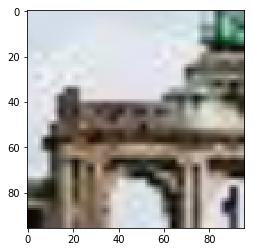

In [5]:
plt.imshow(hr_images[0].numpy().transpose(1,2,0))

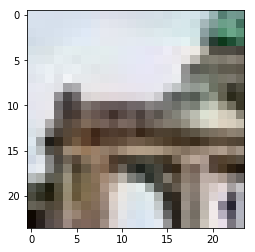

In [6]:
plt.imshow(lr_images[0].numpy().transpose(1,2,0))

In [7]:
generator = model.Generator()

In [8]:
network = loss.PerceptualLoss()

In [9]:
sgd = torch.optim.SGD(lr=1e-4,params=generator.parameters())

In [ ]:
generated_imgs = generator(lr_images)

In [ ]:
loss_images = network(generated_imgs,hr_images)

In [ ]:
generator.zero_grad()

In [ ]:
loss_images

In [26]:
loss_images.backward(retain_graph=True)

In [27]:
sgd.step()

In [ ]:
tensor(1.00000e-02 *
       3.6637)